In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!unzip '/content/drive/MyDrive/IDCARD_multiclass/IDCardMultiClass.zip'

Archive:  /content/drive/MyDrive/IDCARD_multiclass/IDCardMultiClass.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: train/
 extracting: train/1-1-_jpg.rf.0d14452bec040560a5d66996a0a5c6ba.jpg  
 extracting: train/1-1-_jpg.rf.5b79c1cd7c1811766dc656b627971708.jpg  
 extracting: train/1-1-_jpg.rf.d7245a749a370276485b37a4d59d3be8.jpg  
 extracting: train/10006989389712_VoterID_jpg.rf.2b294dab073d81bd60bf23f0c1d25be5.jpg  
 extracting: train/10006989389712_VoterID_jpg.rf.32aa77d12921b901504185df413fc9c5.jpg  
 extracting: train/10006989389712_VoterID_jpg.rf.48f7ab5c6ca5d32f826e8d1ee472cdb0.jpg  
 extracting: train/10018657562676_VoterID_JPG.rf.4720710beccf5b84d3f533c50846d053.jpg  
 extracting: train/10018657562676_VoterID_JPG.rf.78c4d2743d4903175e74fe2f0cd0cd0e.jpg  
 extracting: train/10018657562676_VoterID_JPG.rf.87e4cfba7372dc61028419a70f64b5f2.jpg  
 extracting: train/10018765037077_VoterID_jpg.rf.4eb8fc55dd39dd5a87f218f0c2bc14a7.jpg  
 extra

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/IDCARD_multiclass/train_classes.csv')
valid_df=pd.read_csv('/content/drive/MyDrive/IDCARD_multiclass/valid_classes.csv')

train_df.columns = train_df.columns.str.strip()
valid_df.columns = valid_df.columns.str.strip()

In [ ]:
train_df.head()

,filename,aadhar,driver-license,pan,passport,voter
0,37_png.rf.afe280e3bb8242c7140b44fd96b739f0.jpg,0,0,0,0,1
1,10_jpg.rf.a88a82d291b8c99c778e526f79ebd4f7.jpg,0,0,0,0,1
2,9_png.rf.a652a52800614e63998ebfee966e128d.jpg,1,0,0,0,0
3,38_png.rf.ad09e4cb47c8dbd93787c451b186e842.jpg,0,0,0,0,1
4,111_jpg.rf.a50f0a2bbb61d5fc261cfe41d57757f2.jpg,0,0,0,1,0


In [ ]:
valid_df.head()

,filename,aadhar,driver-license,pan,passport,voter
0,5-1-_jpg.rf.016e016cdf0441cbfc6b3a84fe29671c.jpg,1,0,0,0,0
1,40_png.rf.085f590f08c256b0ce5983eda91c4fa8.jpg,0,0,0,0,1
2,11_jpg.rf.0d600ffda10607c2c1a5d10f55bf5b58.jpg,1,0,0,0,0
3,17_png.rf.0b58eea3a9e5a7168778942c3f321c8d.jpg,0,1,0,0,0
4,20_jpeg.rf.0953c12cae35d3aa9c8f99dec7877db6.jpg,0,0,0,0,1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#preprocessing, rescaling & data augumentation

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

valid_datagen=ImageDataGenerator(rescale=1./255)

label_columns=['aadhar','driver-license','pan','passport','voter']

#Creating ImageDataGenerators for Training and Validation
train_generator=train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/train',
    x_col='filename',
    y_col=label_columns,
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    color_mode='grayscale'
)

valid_generator=valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory='/content/valid',
    x_col='filename',
    y_col=label_columns,
    target_size=(224,224),
    batch_size=32,
    class_mode='raw',
    color_mode='grayscale'
)

Found 360 validated image filenames.
Found 100 validated image filenames.


In [ ]:
#Building CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Input, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16

input_shape = (224, 224, 1)

model = models.Sequential()

model.add(Conv2D(3, (3, 3), padding='same', input_shape=input_shape))

vgg_base=VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in vgg_base.layers[:-4]:
    layer.trainable = False

model.add(vgg_base)

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 3)         │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,138,787 (80.64 MB)

 Trainable params: 13,503,523 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
#compiling model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.00001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

model_history=model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.2758 - loss: 1.8947 - val_accuracy: 0.4400 - val_loss: 1.4028 - learning_rate: 1.0000e-05
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 430ms/step - accuracy: 0.3461 - loss: 1.5292 - val_accuracy: 0.5900 - val_loss: 1.2680 - learning_rate: 1.0000e-05
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.4046 - loss: 1.4202 - val_accuracy: 0.6200 - val_loss: 1.1631 - learning_rate: 1.0000e-05
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 451ms/step - accuracy: 0.5189 - loss: 1.2382 - val_accuracy: 0.6000 - val_loss: 1.0676 - learning_rate: 1.0000e-05
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - accuracy: 0.5615 - loss: 1.2093 - val_accuracy: 0.6700 - val_loss: 1.0100 - learning_rate: 1.0000e-05
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - accuracy: 0.5311 - loss: 1.1132 - val_accuracy: 0.7000 - val_loss: 0.9288 - learning_rate: 1.0000e-05
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - accuracy: 0.5691 - l

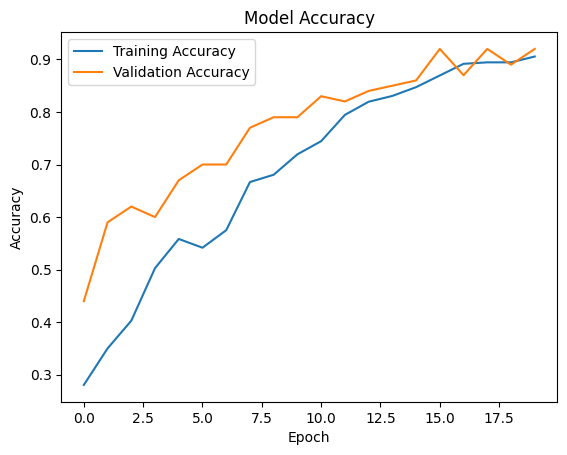

In [ ]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

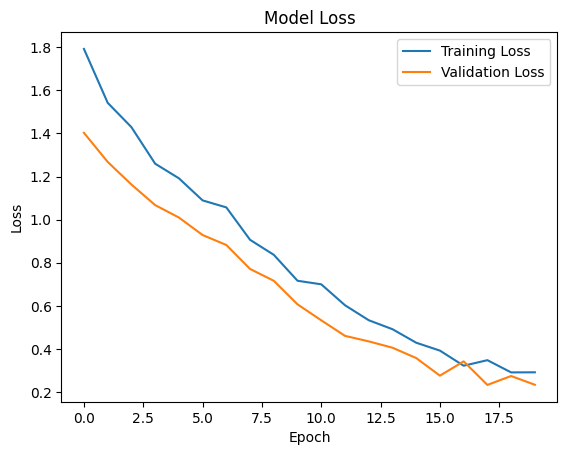

In [ ]:
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [ ]:
score = model.evaluate(valid_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9232 - loss: 0.2526 


In [ ]:
val_accuracy = model_history.history['val_accuracy'][-1]
val_accuracy*100

92.00000166893005

In [ ]:

from tensorflow.keras.preprocessing import image

img_path = '/content/1_sample.jpg'
img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
predicted_class = label_columns[predicted_class_index]

predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'pan'